Harjoitukset5

Tehtävä1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   Air temperature, degC  aika, s
0                    6.5      0.0
1                    6.2    600.0
2                    5.7   1200.0
3                    5.7   1800.0
4                    5.7   2400.0


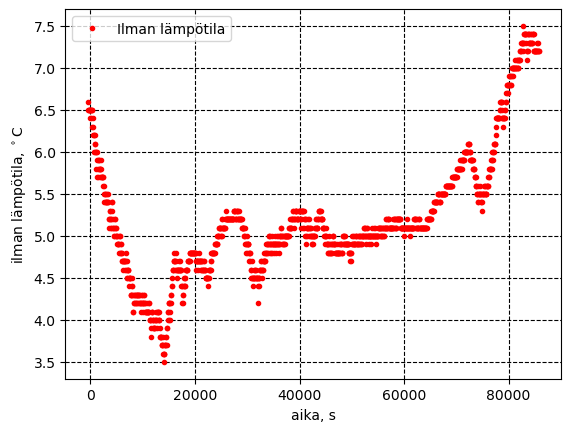

In [2]:

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'
saadf = pd.read_csv(url,sep=',',decimal='.')
result = saadf[['Air temperature, degC']].copy()
result['aika, s'] = (pd.to_datetime(saadf['Unnamed: 0']) - pd.to_datetime(saadf.loc[0,'Unnamed: 0'])).dt.total_seconds()
print(result.head())


plt.plot(result['aika, s'],result['Air temperature, degC'],'r.',label='Ilman lämpötila')
plt.grid(color='black',linestyle='--')
plt.xlabel('aika, s')
plt.ylabel('ilman lämpötila, $^\circ$C')
plt.legend()
plt.show()

Tehtävä2B

  short_name   Win Type  Wins
0    Arsenal  wins_home    14
1  Tottenham  wins_home    12
2    ManCity  wins_home    18
3    Everton  wins_home    10
4       ManU  wins_home    10
5  Liverpool  wins_home    17
6    Chelsea  wins_home    12


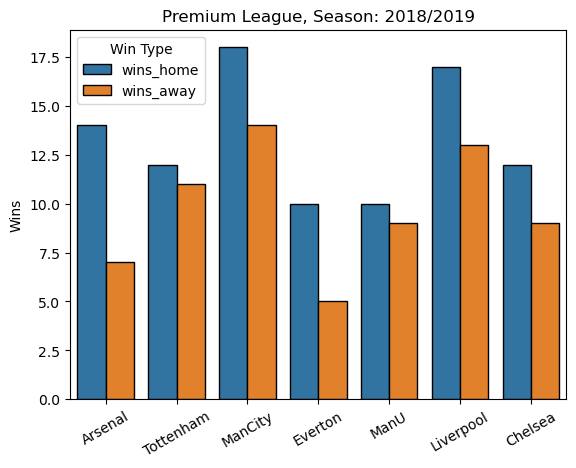

In [3]:

url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"
vldf1 = pd.read_csv(url)
vldf2 = vldf1[['common_name','wins_home','wins_away']]
vldf2 = vldf2[vldf2['common_name'].isin(['Arsenal','Tottenham Hotspur','Manchester City','Manchester United','Chelsea','Liverpool','Everton'])]
vldf2['short_name'] = vldf2['common_name']
vldf2['short_name'].replace({'Tottenham Hotspur':'Tottenham','Manchester City':'ManCity','Manchester United':'ManU'},inplace=True)
vldf2 = vldf2.melt(id_vars=['short_name'],value_vars=['wins_home','wins_away'],var_name='Win Type',value_name='Wins')
print(vldf2.head(7))

ax = sns.barplot(x='short_name',y='Wins',hue='Win Type',data=vldf2,edgecolor='black')
plt.title('Premium League, Season: 2018/2019')
ax.set(xlabel=None)
plt.xticks(rotation=30)
plt.show()




Tehtävä3

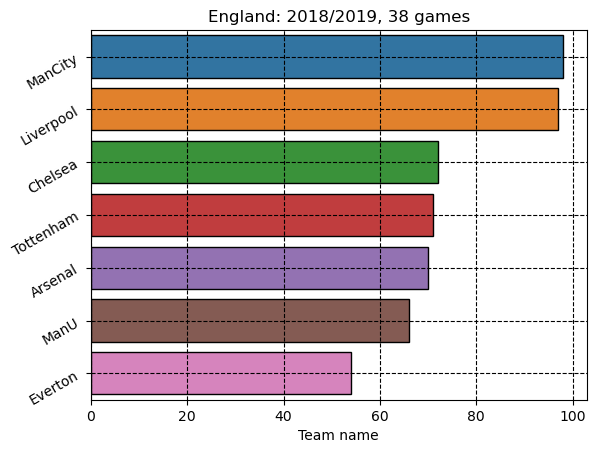

In [276]:
url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"
valioliigadf1 = pd.read_csv(url)
valioliigadf2 = valioliigadf1[['team_name','common_name','season','wins','draws','losses']]
valioliigadf2 = valioliigadf2[valioliigadf2['common_name'].isin(['Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'])]
valioliigadf2['short_name'] = valioliigadf2['common_name']
valioliigadf2['short_name'].replace({'Tottenham Hotspur':'Tottenham','Manchester City':'ManCity','Manchester United':'ManU'},inplace=True)
valioliigadf2['points'] = valioliigadf2['wins'] * 3 + valioliigadf2['draws']
valioliigadf2.sort_values(by='points',ascending=False,inplace=True)


ax = sns.barplot(y='short_name',x='points',data=valioliigadf2,edgecolor='black')
plt.yticks(rotation=30)
plt.title('England: ' + valioliigadf1['season'][0] + ', ' + str(valioliigadf1['matches_played'][0]) + ' games')
ax.set(xlabel='Team name',ylabel=None)
ax.grid(color='black',linestyle='--')
plt.show()

Tehtävä4

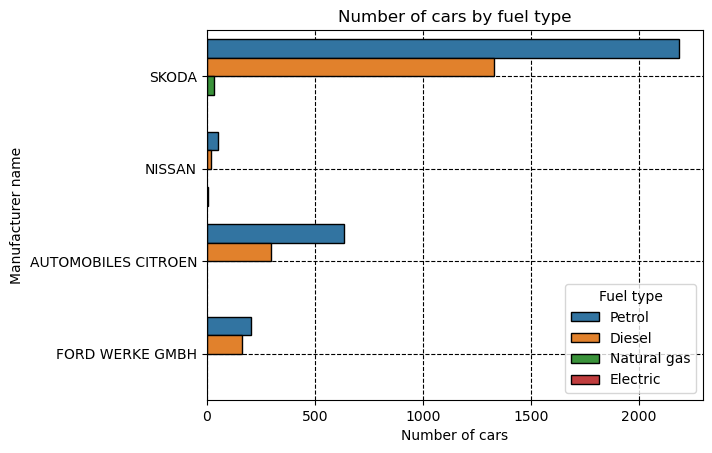

In [275]:
url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'
cardf = pd.read_csv(url,sep='\t')
cardf2 = cardf.groupby('Mh').filter(lambda x: len(x) > 50)
cardf2['Ft'].replace({'DIESEL':'Diesel','PETROL':'Petrol','NG':'Natural gas'},inplace=True)

ax = sns.countplot(y='Mh',hue='Ft',data=cardf2,edgecolor='black')
ax.legend(title='Fuel type')
ax.set_axisbelow(True)
ax.set_xlabel('Number of cars')
ax.set_ylabel('Manufacturer name')
ax.set_title('Number of cars by fuel type')
sns.move_legend(ax,'lower right')
ax.grid(color='black',linestyle='--')
plt.show()

Tehtävä5

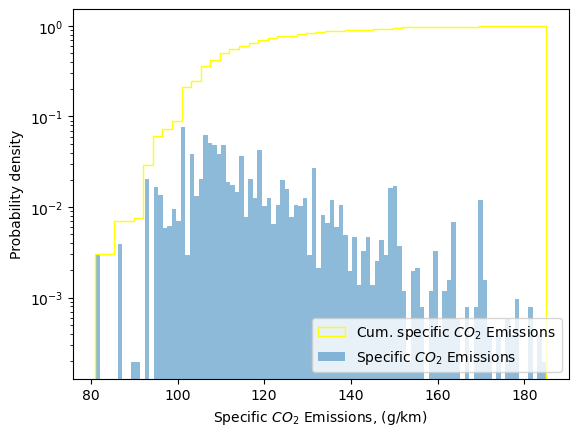

<Figure size 640x480 with 0 Axes>

In [277]:
url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'
carsdf = pd.read_csv(url,sep='\t')
carsdf2 = carsdf[(carsdf['Enedc (g/km)'] > 0) & (carsdf['Mh'].map(carsdf['Mh'].value_counts()) > 50)]

ax1 = sns.histplot(x='Enedc (g/km)',bins=100,data=carsdf2,stat='density',edgecolor=None,alpha=0.5,label='Specific $CO_2$ Emissions')
ax2 = sns.histplot(x='Enedc (g/km)',ax=ax1,data=carsdf2,stat='density',cumulative=True,element='step',color='yellow',alpha=0,label='Cum. specific $CO_2$ Emissions')
plt.xlabel('Specific $CO_2$ Emissions, (g/km)')
plt.ylabel('Probability density')
plt.legend(loc='lower right')
plt.yscale('log')
plt.show()
plt.savefig('Emissions stats',dpi=400)

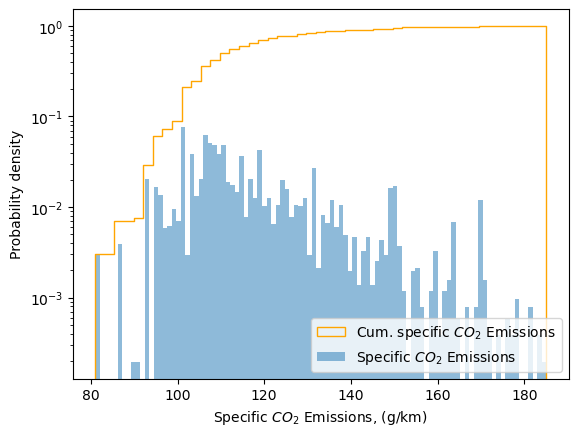

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'
df = pd.read_csv(url, sep='\t', decimal='.')

df_cars = df[(df['Mh'].groupby(df['Mh']).transform(lambda x: len(x) > 50)) & (df['Enedc (g/km)'] > 0)]

#kuvio
ax1 = sns.histplot(df_cars['Enedc (g/km)'].dropna(),bins=100, stat='density', kde=False, edgecolor=None, alpha=0.5, label='Specific $ CO_2 $ Emissions')
ax2 = sns.histplot(df_cars['Enedc (g/km)'].dropna(), ax=ax1, stat='density', kde=False,cumulative=True, element='step', color='orange', alpha=0, label='Cum. specific $ CO_2 $ Emissions ')

plt.yscale('log')
plt.ylabel('Probability density')
plt.xlabel('Specific $ CO_2 $ Emissions, (g/km)')
plt.legend(loc=4)
plt.show()